# Analyzing and extending the Diamond and Dybvig model with some insights from Behavioural Economics"
   

### Final assignment for the Course Applied Economic Analysis, 31/01/2017

Name | ANR
------------ | -------------
Ryan Collier | 514614 
Jan Machacek | 991009
Carlotta Varriale | 608931

# Motivation

We start from the assumptions of the paper by [Diamond and Dybvig](https://www.macroeconomics.tu-berlin.de/fileadmin/fg124/financial_crises/literature/Diamon_Dybvig_Bank_Runs__Deposit_Insurance__and_Liquidity.pdf)
to develop a few extensions to their theoretical model that seem to fit the observed mechanisms of bank runs.
Specifically, we considered that some insights from **Behavioral Economics** that use a hyperbolic discounting factor might help to improve the quality of the standard model on bank runs in predicting depositors' behaviour.
An improved model of bank runs will make it possible for banks and/or policy makers to act in times of financial distress. Moreover, we decided to use **Python** as the main platform to develop our work because it is a great tool to formalize our mathematical formulations and visually explore our results. 
We will begin with a description of the standard model by making ad hoc use of variables and constraints to solve the optimization problem of allocation and consumption in different time periods. We will show that banks provide improved distribution efficiency than autarky, but bank runs equilibria are also possible, which are potential catastrophes and much worse than autarky.
Then, we will run a simple simulation to explore the relationship between number of withdrawals, probability of bank closing and interest rate on deposits.(?)
Finally, we introduce the concept of hyperbolic discounting and implement it in the expression of the model,trying to empirically measure the degree of time inconsistency for depositors.

# Description of the model 

$ 1. $ Expected utility of agent at T = 0:

$ U(c_1,c_2) = tu(c_1) + \rho(1-t)u(c_2) $

...Where

$ u'(0) =\infty $

$ u'(\infty) =0 $

$ -c\frac{u''(c)}{u'(c)}\:\verb+>+\:1 $

$ 2. $ Optimal allocation:

$ \max_{x,c_1,c_2}[tu(c_1) + \rho(1-t)u(c_2)] $

...subject to resource constraints for periods 1 and 2:

$ tc_1\:\leq\:x $

$ (1-t)c_2\:\leq\:(1-x)R $


The resource constraints will be satisfied with equality since the function is strictly increasing. Therefore:


$ \max\Big[tu(\frac{x}{t}) + \rho(1-t)u\frac{(1-x)R}{1-t}\Big] $

FOC...

$ u'\Big(\frac{x}{t}\Big) = R\rho u'\Big(\frac{(1-x)R}{1-t}\Big) $ 

or

$ u'(c_1) = u'(c_2)R\rho $

$ \Rightarrow 0\:\leq\:x\:\leq\:1\; $ at the optimum, so $ c_1\:\verb+>+\:0 $
$ \Rightarrow $ Since $ \;\rho R\;\geq\;0\; $ and the function is strictly concave: $\;c_2\;\geq\;c_1 $

**Therefore, it is possible to say that this allocation is efficient and incentive compatible.** 

$ 3. $ The optimum:

$ c_1^*\;\verb+>+\;1 $

$ c_2^*\;\verb+<+\;R\ $

This confirms that consumption in both time periods is higher than it would be without banks ($ c_1^* = 1 $ and $ c_2^* = R $)

# Simulation of a Bank Run

In this part, we run a simple simulation of the bank run in order to show several implications of the Diamond & Dybvig model. 
For this purpose, we used simulations created by [Christian Yenko](https://github.com/cyenko/dd_sim) which we simplified and adjusted.

In [12]:
import random
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *
import math
import sys

Firstly, we set some initial values of key variables. We used the same values as C. Yenko; any change is possible, though.

In [13]:
interestRate = 0.2
# Some initial interest rate must be set, otherwise the trial would not work. 
# This particular value is determining for the second simulation only.
maxWithdrawals = 70
# The maximum number of people (out of 100) who may withdraw their money without the bank has to close.
# This particular value is determining for the first simulation only.
numTrials = 100
# The total number of simulations made; during each of them the bank either close or not.

Then we write the general simulation code. The following input contains one trial which is then employed by the final two simulations. Also note that accurate indentation is essential here in order to run the simulation with all the persons involved in each round.

In [14]:
def runTrial(interestRate,maxWithdrawals):
        numWithdrawals = 0
        # The initial number of withdrawals is 0. 
        # It increases by 1 with each person who decides during any round to withdraw.
        withdrawParameter = 0
        # This parameter increases with every withdrawal. 
        # Higher the parameter is, higher is the current risk aversion of every person.
        peopleList = []
        for i in range(0,100):
            peopleList.append([random.normalvariate(.5,.5/3),0,i])
        # The People List contains personal data of every person out of 100.
        # [0] The first number is a random risk parameter with mean=0.5 and SD=(0.5/3).
        # [1] The second one determines whether the person has already decided to withdraw (1) or not (0).
        # [2] At the third position is "i" - a number in range 0-99 which serves as a personal ID.
        for roundNum in range (0,3):
        # There are 3 rounds of each simulation, in the Diamond&Dybvig paper described as periods T=0,1,2.
            if numWithdrawals < maxWithdrawals:
            # A condition necessary for each round; if not satisfied the bank has already closed.
                for person in peopleList:
                    if numWithdrawals < maxWithdrawals:
                        if not person[1] == 1:
                        # Check if this person has still her investment in bank.
                        # I.e. this person has not withdrawn in previous rounds.
                            num = random.random()
                            # Return a random number in range [0.0, 1.0).
                            currentRiskAversionParam = person[0]+withdrawParameter-interestRate
                            # It is different for each person because of the random risk parameter.
                            # It also varies between rounds as the withdraw parameter may change.
                            if num < currentRiskAversionParam:
                            # Then this person withdraws.
                                numWithdrawals = numWithdrawals + 1
                                person[1]=1
                                # Ensure this person may not participate in following rounds.
                                withdrawParameter = numWithdrawals/100
                                # So that the parameter is higher for every following person and round.
        if numWithdrawals < maxWithdrawals:
            return 0
        else:
            return 1
        # This loop runs after the whole trial (3 rounds with 100 persons).
        # The trial counts for 1 in case that the bank had to close during it.

In the first simulation, we run the trials with gradually increasing interest rate in order to find the relationship between the interest rate and the probability of bank closure.

In [15]:
x = []
y = []
for inc in range(0,100,1):
        interestRate = float(inc)/100
        # The interest rate gradually increases from 0.00 to 0.99.
        closeSum = 0
        for i in range(0,numTrials):
            closeSum = closeSum + runTrial(interestRate,maxWithdrawals)
            # This variable sums the total number of trials when the bank had to close.
        fractionClose = float(closeSum)/numTrials
        x.append(interestRate)
        y.append(fractionClose)
        # Both the interest rate and the fraction of closed banks are added to lists representing x and y axis.

Finally, we plot the results. The relationship is rather clear - higher the interest rate is, lower is the probability of the bank closure as the Current Risk Aversion Parameter is lower, hence less people prefer withdrawing their money. The shape of the curve is rather steep, indicating that interest rate above 20% guarantees almost zero risk of bank closure.

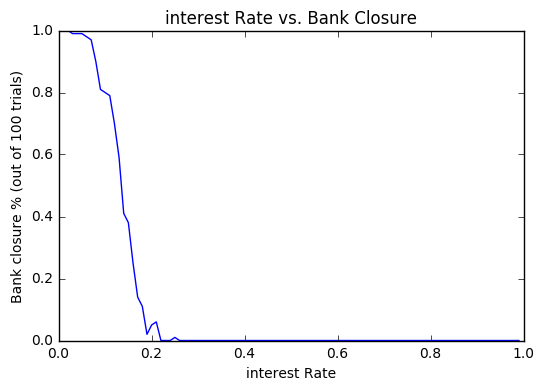

In [16]:
plt.plot(x,y)
plt.xlabel("interest Rate")
plt.ylabel("Bank closure % (out of 100 trials)")
plt.title("interest Rate vs. Bank Closure")
plt.show()

The second simulation shows the effect of increasing maximum number of withdrawals (i.e. how many people may withdraw their initial investment unless the bank closes) on the probability of the bank closure.

In [17]:
x = []
y = []
for inc in range(0,100,1):
        interestRate = 0.2
        # The interest rate is now fixed again.
        maxWithdrawals = inc
        # The maximum number of withdrawals gradually icreases from 0 to 99.
        closeSum = 0
        for i in range(0,numTrials):
            closeSum = closeSum + runTrial(interestRate,maxWithdrawals)
        fractionClose = float(closeSum)/numTrials
        x.append(maxWithdrawals)
        y.append(fractionClose)

Also here the line is rather steep: given the 20% interest rate, up to maxWithdrawals around 50 the bank had to close in almost every trial. Then the probability is sharply decreasing and it is almost zero above 70 withdrawals.

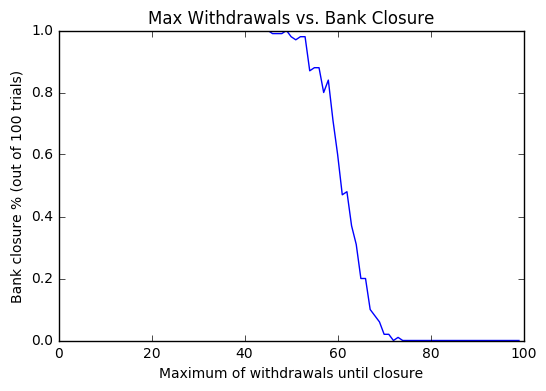

In [18]:
plt.plot(x,y)
plt.xlabel("Maximum of withdrawals until closure")
plt.ylabel("Bank closure % (out of 100 trials)")
plt.title("Max Withdrawals vs. Bank Closure")
plt.show()

The simulation shows that both higher interest rate and higher maximum number of withdrawals (determined mostly by bank reserves) lower the risk of bank closure (i.e. "successful" bank run). The implication for the banking policy is a rather straightforward trade-off between low deposites (or illiquid investments) and providing high interest rate and vice versa.

# Extending the existing model using some insights from Behavioural Economics

So far we explained and simulated the standard Diamond and Dybvig model without making any assumption about the discounting technique used. Indeed, the authors do not specify the functional form of their discount factor, and we could assume that they use **exponential discounting**, the standard model which implies consistent preferences over time. Although this is the most commonly used model in economics because of its simplicity, other models have shown to describe the empirical reality better [Frederik et al., 2002](http://www.cmu.edu/dietrich/sds/docs/loewenstein/TimeDiscounting.pdf)
Exponential discounting assumes that the marginal rate of substitution between consumption in different time periods is only dependent on the time interval between the two time periods. In other words, the discount rate should be constant over time: 1 / (1+K)t. However, empirical studies such as [Thaler, 1981](http://faculty.chicagobooth.edu/richard.thaler/research/pdf/Some%20Empirical%20Evidence%20on%20Dynamic%20Inconsistency.pdf) show that often people show time inconsistent tendencies. Most people prefer 50 dollars today to 55 tomorrow while preferring 55  dollars in 366 days to 
50 dollars in 365 days. 
Behavioral economists developed the **hyperbolic discounting** model to incorporate this human tendency for time inconsistent behavior. 
In this model, the discounting factor depends on both the length of the delay and on the timing of the delay.
As a result, hyperbolic discounting discounts future rewards more than exponential discounting for short delays but less for long delays. This makes it more useful to predict actual human behavior. 
As Diamond and Dybvig (1983) pointed out, bank runs can occur due to self-fulfilling expectations of the behavior of other individuals. Hyperbolic discounting and time inconsistent models try to capture the variations in degree of patience across time. To get a better empirical description of bank runs, we thought of incorporating the hyperbolic discounting assumption in the model, according to which it might be possible that individuals, after learning their type at T=1, still behave contrary to their type. 
Our model should be therefore integrated as follows:


# $ \tu(c_1)+(1-t)u(c_2)\rho $ 


With:

# $ \rho= \frac{1}{1+kD} $

Where k is a parameter that indicates the degree of discounting and D is the number of weeks of delay. This is the **hyperbolic discounting** factor. 
On the other hand, the **exponential discounting** factor used in time consistent models predicts that the marginal rate of substitution between consumption at time t and t+1 only depends on the time span between them. 
It is expressed as:


# $ \rho'= \e^{-kD} $

In [ ]:
Now we will compare mathematically and graphically these two different discounting models.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
def hyper_disc(x):
    return(1/(1+x))/(1/(1+x-1))
hyper_disc(1)

0.5

In [2]:
hyper_disc(2)

0.6666666666666666

In [3]:
hyper_disc(12)

0.9230769230769231

In [ ]:
hyper_disc(40)


In [4]:
from math import exp
def exp_disc(y):
    return exp(-y)/exp(-(y-1))

In [5]:
exp_disc(1)

0.36787944117144233

In [6]:
exp_disc(2)

0.36787944117144233

In [7]:
exp_disc(12)

0.36787944117144233

In [8]:
exp_disc(40)

0.36787944117144233

The discounting factor of next week (n=1) with respect to today(n=0) for the exponential discounting is $ \huge \frac{1}{e} $

The discounting factor of 12 weeks from now (n=12) with respect to 11 weeks from now (n=11) is also  $ \huge \frac{1}{e} $

So this is what we mean by **consistent preferences**: constant delta of discount factor for the same time span (one week).
However, with hyperbolic discounting we can see that the discounting factor of next week with respect to today is 0,5

while the discounting factor of 12 weeks from now with respect to 11 weeks is 0,923. 

This shows that for low Ds, that is for a short time delay, the discounting factor is similar, but as we increase D, the hyperbolic discounting factor tends to 1, so the present value of a reward in the far future is almost zero according to **hyperbolic discounting**.

| weeks | d_exp | d_hyper |
|-------|-------|---------|
| 1     | 0,367 | 0,5     |
| 2     | 0,367 | 0,66    |
| 12    | 0,367 | 0,923   |
| 40    | 0,367 | 0,975   |


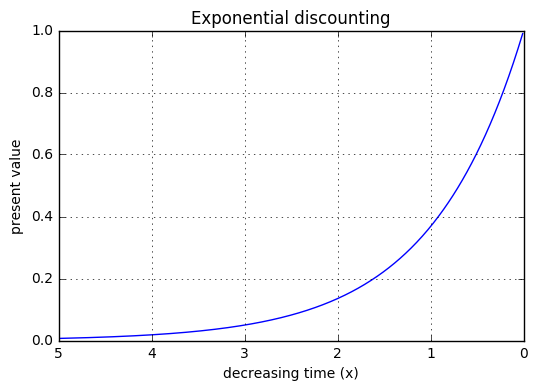

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.01, 5.0, 0.01)
y = np.exp(-x)
plt.plot(x, y)

plt.xlim(5, 0) 

plt.xlabel('decreasing time (x)')
plt.ylabel('present value')
plt.title('Exponential discounting')
plt.grid(True)


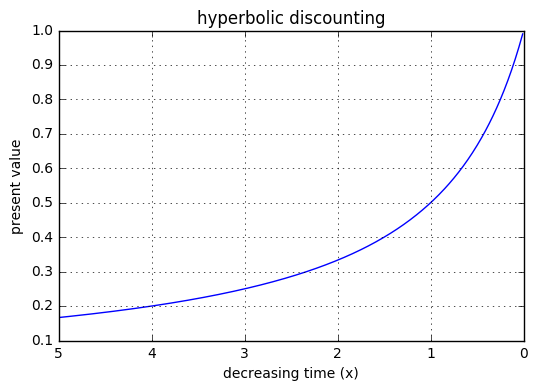

In [11]:
x = np.arange(0.01, 5.0, 0.01)

y = 1/(1+x)

fig, ax = plt.subplots()
plt.xlim(5, 0)
ax.plot(x, y)
plt.xlabel('decreasing time (x)')
plt.ylabel('present value')
plt.title('hyperbolic discounting')
plt.grid(True)

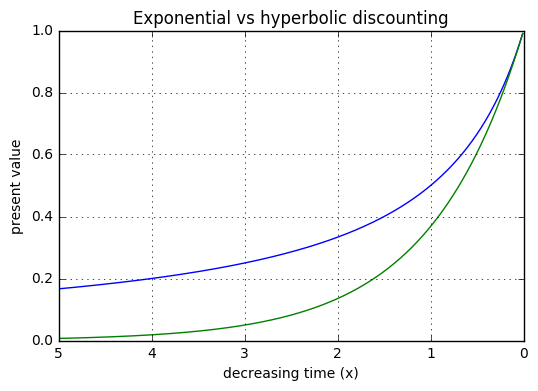

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.01, 5.0, 0.01)

y = 1/(1+x)

fig, ax = plt.subplots()
plt.xlim(5, 0)
ax.plot(x, y)
plt.xlabel('decreasing time (x)')
plt.ylabel('present value')
plt.title('hyperbolic discounting')
plt.grid(True)

x = np.arange(0.01, 5.0, 0.01)
y = np.exp(-x)
plt.plot(x, y)

plt.xlim(5, 0) 

plt.xlabel('decreasing time (x)')
plt.ylabel('present value')
plt.title('Exponential vs hyperbolic discounting')
plt.grid(True)

# Empirical research

In order to exploit this intuition in relation to bank runs, we could use a randomized control trial by conducting a lab experiment. 
The design of the experiment would consist in asking people to decide how to allocate a certain endowment between immediate consumption and savings at a bank. After this decision, half of the subjects would be chosen at random and asked if they want to change their allocations given the rumors that the bank can have liquidity problems next month; instead, the remaining control group would be told that the bank can have liquidity problems the next month, but one year from now. 

**If inconsistent and time-impatient individuals tend to have a lower discount factor (higher discount rate) for close future than for far events, we could expect that more people change their decisions and decide to save less in the treatment group than in the control group.**


# Conclusions and recommendations 

As Diamond and Dybvig (1983) pointed out bank runs can occur due to a self-fulfilling prophecy based on expectations of the **behaviour** of other individuals.
Given this close link with behavioural economics, we decided to review and explore the hyperbolic discounting model, which we thought might explain why people sometimes do not respect the commitment they make in T=0 with respect to time T=1: when T=1 approaches, they often revise their programmed behavior.  
This is the reason why we often observe that people on Saturday commit on “starting a diet on Monday”, but then they change their minds when the day comes, or for they decide on saving some amount for the future but in the end spend it before the due time.

Some people, however, are sophisticated enough to anticipate that they might have time inconsistent behavior and try to insure against it in time 0, for example by not buying unhealthy food or by keeping their savings in a place that is difficult to reach.

**In this light, making deposits illiquid by suspending convertibility could therefore be an effective and advisable measure. Indeed, it would serve not only a shelter for financial institutions to avoid bank runs, but it would  have the double effect of providing customers with a shelter from their own “temptation” to inconsistently revise their decisions and withdraw their funds before they committed to.** 





# Appendix: optimisation with Phyton

In [19]:
import numpy as np
from scipy import optimize
import random

In [20]:
def output ():
    t = random.random() # Return a random number in range [0.0, 1.0)
    p = 0.5
    R = 0.2 
    def Uc1(x,t):
        return (x/t)
    def Uc2(x,t,R):
        return (((1-x)*R)/(1-t))
    return optimize.fsolve(lambda x: t*Uc1(x,t)+(1-t)*p*Uc2(x,t,R), 0)


In [21]:
print output() # So this is the output dependent on values of p and R

[-0.11111111]
